In [144]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import bz2
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [145]:
import warnings
warnings.filterwarnings("ignore")

In [146]:
import xgboost

In [147]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

#### FILLING NA VALUES  

In [148]:
nacolumn_train=[]
for i in  train.columns:
  if pd.isna(train[i]).any():
    nacolumn_train.append(i)
nacolumn_train

['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']

In [149]:
dict_medianna={}
for i in nacolumn_train:
  dict_medianna[i]=train[i].mean()


In [150]:
dict_medianna

{'Age': 39.62279902853673,
 'Pay_Scale': 6.0062938063224145,
 'Time_of_service': 13.385064177362894,
 'VAR2': -0.008125969173281976,
 'VAR4': 1.891078184110971,
 'Work_Life_balance': 2.3878952639862643}

In [151]:
nacolumn_test=[]
for i in  test.columns:
  if pd.isna(test[i]).any():
    nacolumn_test.append(i)
nacolumn_test

['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']

In [152]:
train_filled=train.fillna(train.median())

In [153]:
test_filled=test.fillna(train.median())

In [154]:
xtrain_filled=train_filled.drop(columns=["Attrition_rate"])
xtest_filled=test_filled

In [155]:
ytrain=train_filled["Attrition_rate"]


In [156]:
catdata_train=train_filled[["Gender","Education_Level","Relationship_Status","Hometown","Unit","Decision_skill_possess","Compensation_and_Benefits"]]
catdata_test=test_filled[["Gender","Education_Level","Relationship_Status","Hometown","Unit","Decision_skill_possess","Compensation_and_Benefits"]]

In [157]:
enc=OneHotEncoder()
train_catohe=pd.DataFrame(enc.fit_transform(catdata_train).toarray(),columns=enc.get_feature_names())
test_catohe=pd.DataFrame(enc.transform(catdata_test).toarray(),columns=enc.get_feature_names())

In [158]:
train_catohe.head()
#enc.get_feature_names()

,x0_F,x0_M,x1_1,x1_2,x1_3,x1_4,x1_5,x2_Married,x2_Single,x3_Clinton,x3_Franklin,x3_Lebanon,x3_Springfield,x3_Washington,x4_Accounting and Finance,x4_Human Resource Management,x4_IT,x4_Logistics,x4_Marketing,x4_Operarions,x4_Production,x4_Purchasing,x4_Quality,x4_R&D,x4_Sales,x4_Security,x5_Analytical,x5_Behavioral,x5_Conceptual,x5_Directive,x6_type0,x6_type1,x6_type2,x6_type3,x6_type4
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [159]:
xtrain_filled.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [160]:
sc=StandardScaler()

In [161]:
train_growthrate=pd.DataFrame(sc.fit_transform(xtrain_filled["growth_rate"].values.reshape(-1,1)),columns=["growth_rate"])
test_growthrate=pd.DataFrame(sc.transform(xtest_filled["growth_rate"].values.reshape(-1,1)),columns=["growth_rate"])

In [162]:
train_Age=pd.DataFrame(sc.fit_transform(xtrain_filled["Age"].values.reshape(-1,1)),columns=["Age"])
test_Age=pd.DataFrame(sc.transform(xtest_filled["Age"].values.reshape(-1,1)),columns=["Age"])

In [163]:

train_Time_of_service=pd.DataFrame(sc.fit_transform(xtrain_filled["Time_of_service"].values.reshape(-1,1)),columns=["Time_of_service"])
test_Time_of_service=pd.DataFrame(sc.transform(xtest_filled["Time_of_service"].values.reshape(-1,1)),columns=["Time_of_service"])

In [164]:
numerical=set(["growth_rate","Age","Time_of_service"])
category=set(catdata_train.columns)
minmax=set(xtrain_filled.columns)-numerical-category-set(["Employee_ID"])

In [165]:
minmax

{'Pay_Scale',
 'Post_Level',
 'Time_since_promotion',
 'Travel_Rate',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'Work_Life_balance'}

In [25]:
minmaxsc=MinMaxScaler()

In [26]:
minmaxsc.fit(xtrain_filled[minmax])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [166]:
train_minmax=pd.DataFrame(xtrain_filled[minmax],columns=list(minmax))
test_minmax=pd.DataFrame(xtest_filled[minmax],columns=list(minmax))

In [167]:
train_vectorised=pd.concat([train_catohe,train_minmax,train_growthrate,train_Age,train_Time_of_service],axis=1)
test_vectorised=pd.concat([test_catohe,test_minmax,test_growthrate,test_Age,test_Time_of_service],axis=1)

In [168]:
lr=LinearRegression()

In [169]:
lr.fit(train_vectorised,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
lr.coef_

array([-6.85987278e+08, -6.85987278e+08, -2.78382024e+11, -2.78382024e+11,
       -2.78382024e+11, -2.78382024e+11, -2.78382024e+11, -6.18027953e+10,
       -6.18027953e+10, -2.56992330e+11, -2.56992330e+11, -2.56992330e+11,
       -2.56992330e+11, -2.56992330e+11, -4.68097355e+10, -4.68097355e+10,
       -4.68097355e+10, -4.68097355e+10, -4.68097355e+10, -4.68097355e+10,
       -4.68097355e+10, -4.68097355e+10, -4.68097355e+10, -4.68097355e+10,
       -4.68097355e+10, -4.68097355e+10, -9.90231957e+10, -9.90231957e+10,
       -9.90231957e+10, -9.90231957e+10,  2.14664718e+10,  2.14664718e+10,
        2.14664718e+10,  2.14664718e+10,  2.14664718e+10, -3.90045546e-04,
       -1.01288902e-03,  2.56034723e-04, -1.47212355e-03, -4.44061260e-03,
       -3.84596821e-03, -3.31677282e-03,  3.46357892e-03,  2.99957980e-03,
       -5.09650886e-03, -1.36487245e-03,  2.92052293e-03,  2.46237634e-03,
       -9.59644637e-05, -3.53571109e-03])

In [171]:
train_predict=lr.predict(train_vectorised)

In [172]:
test_predict=lr.predict(test_vectorised)

In [173]:
mse=mean_squared_error(ytrain,train_predict)

In [174]:
mse

0.03423900030973304

In [175]:
score=100*np.maximum(0,1-mse)

In [176]:
score

96.5760999690267

In [177]:
ytrain.loc[ytrain>0.6]

5       0.7613
19      0.6410
25      0.8727
27      0.6272
38      0.6961
         ...  
6932    0.9735
6946    0.6935
6966    0.8574
6995    0.7839
6997    0.7847
Name: Attrition_rate, Length: 410, dtype: float64

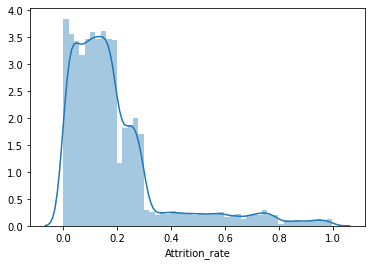

In [178]:
sns.distplot(ytrain)

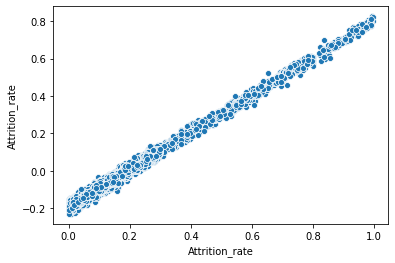

In [179]:
sns.scatterplot(ytrain,ytrain-train_predict)

In [180]:
weights_argasc=np.argsort(np.abs(lr.coef_))

imp_feat=train_vectorised.columns[weights_argasc][0:40]
imp_feat

Index(['Age', 'VAR3', 'VAR6', 'VAR5', 'VAR1', 'Pay_Scale', 'growth_rate',
       'Post_Level', 'Time_since_promotion', 'VAR7', 'Work_Life_balance',
       'Time_of_service', 'Travel_Rate', 'VAR2', 'VAR4', 'x0_M', 'x0_F',
       'x6_type3', 'x6_type2', 'x6_type4', 'x6_type1', 'x6_type0',
       'x4_Purchasing', 'x4_Operarions', 'x4_R&D', 'x4_Sales', 'x4_Marketing',
       'x4_Production', 'x4_Security', 'x4_Accounting and Finance',
       'x4_Quality', 'x4_Human Resource Management', 'x4_Logistics', 'x4_IT',
       'x2_Single', 'x2_Married', 'x5_Conceptual', 'x5_Directive',
       'x5_Analytical', 'x5_Behavioral'],
      dtype='object')

In [181]:
new_features=train_vectorised.columns[weights_argasc][:45]
new_features

Index(['Age', 'VAR3', 'VAR6', 'VAR5', 'VAR1', 'Pay_Scale', 'growth_rate',
       'Post_Level', 'Time_since_promotion', 'VAR7', 'Work_Life_balance',
       'Time_of_service', 'Travel_Rate', 'VAR2', 'VAR4', 'x0_M', 'x0_F',
       'x6_type3', 'x6_type2', 'x6_type4', 'x6_type1', 'x6_type0',
       'x4_Purchasing', 'x4_Operarions', 'x4_R&D', 'x4_Sales', 'x4_Marketing',
       'x4_Production', 'x4_Security', 'x4_Accounting and Finance',
       'x4_Quality', 'x4_Human Resource Management', 'x4_Logistics', 'x4_IT',
       'x2_Single', 'x2_Married', 'x5_Conceptual', 'x5_Directive',
       'x5_Analytical', 'x5_Behavioral', 'x3_Springfield', 'x3_Washington',
       'x3_Clinton', 'x3_Franklin', 'x3_Lebanon'],
      dtype='object')

In [ ]:
final_data=pd.DataFrame(np.hstack((np.array(xtest_filled["Employee_ID"]).reshape(3000,1),test_predict.reshape(3000,1))),columns=["Employee_ID","Attrition_rate"])

In [ ]:
final_data.to_csv("finial_data.csv",index=False)   #81.18777

In [182]:
sgd=SGDRegressor(penalty="l2",learning_rate="constant")


In [183]:
gcv=GridSearchCV(estimator=sgd,scoring='neg_mean_squared_error',param_grid={"alpha":[0.0001,0.001,0.01,0.1,1,10,100]})
gcv.fit(train_vectorised,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='constant',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [184]:
gcv.cv_results_

{'mean_fit_time': array([0.02027469, 0.01900425, 0.02148237, 0.01992884, 0.01812668,
        0.01992068, 0.01868525]),
 'mean_score_time': array([0.00185261, 0.0016778 , 0.00174217, 0.00167575, 0.00273929,
        0.00167041, 0.00173287]),
 'mean_test_score': array([-7.49796164e-01, -2.33168656e-01, -2.49490329e-01, -1.74978262e-01,
        -3.03890673e-01, -5.89175637e-02, -2.07431897e+24]),
 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'rank_test_score': array([6, 3, 4, 2, 5, 1, 7], dtype=int32),
 'split0_test_score': array([-7.00021444e-02, -1.18070999e-01, -7.99232160e-02, -4.56581147e-01,
        -7.71530354e-02, -6.37574674e-02, -1.94042539e+24]),
 'split1_test_score': array([-9.61020825e-02, -

In [185]:
sgd=SGDRegressor(alpha=10)
sgd.fit(train_vectorised,ytrain)
testsgd_predict=sgd.predict(test_vectorised)

In [186]:
trainsgd_predict=sgd.predict(train_vectorised)

In [187]:
mse_sgd=mean_squared_error(ytrain,trainsgd_predict)
mse_sgd

0.03607250170663637

In [188]:
final_data=pd.DataFrame(np.hstack((np.array(xtest_filled["Employee_ID"]).reshape(3000,1),testsgd_predict.reshape(3000,1))),columns=["Employee_ID","Attrition_rate"])
final_data.to_csv("finial_data.csv",index=False) #100 81.25910 #10 81.244

In [189]:
sgd.coef_

array([ 2.14441090e-04, -6.35395293e-04, -5.39693681e-05,  4.25062597e-05,
       -5.18659962e-04, -2.41091578e-04,  3.50260445e-04,  9.02527573e-05,
       -5.11206961e-04, -5.91281036e-04, -2.06246157e-04, -2.77505374e-04,
        5.05979703e-04,  1.48098660e-04, -2.93858246e-04,  1.63695740e-04,
        4.72033922e-04, -6.20269279e-04,  8.57521195e-05, -1.53280166e-04,
        2.31529966e-05,  1.07300209e-04, -1.03122896e-04, -6.59805276e-05,
        9.12637210e-05, -1.27641797e-04,  1.79780453e-04, -4.59548744e-04,
        4.38594538e-05, -1.85045366e-04,  8.13141263e-05, -4.66994551e-05,
       -7.01556265e-04,  5.04074164e-04, -2.58086774e-04, -1.81813811e-03,
       -2.85486961e-04,  1.06751001e-03, -1.58271149e-03, -2.04902845e-03,
       -4.53908764e-04, -9.60844583e-04, -1.44943470e-03,  7.59191300e-04,
       -2.89759947e-04, -2.01508208e-04, -6.41609502e-04,  8.88726889e-07,
       -3.20164327e-04,  3.05228273e-04])

In [190]:
np.argsort(sgd.coef_)

array([39, 35, 38, 42, 41, 32, 46,  1, 17,  9,  4,  8, 27, 40, 48, 14, 44,
       36, 11, 34,  5, 10, 45, 29, 19, 25, 22, 23,  2, 31, 47, 20,  3, 28,
       30, 18,  7, 24, 21, 13, 15, 26,  0, 49,  6, 16, 33, 12, 43, 37])

In [191]:
train_vectorised.columns[np.argsort(np.abs((sgd.coef_)))]

Index(['growth_rate', 'x4_Production', 'x1_2', 'x5_Conceptual', 'x6_type1',
       'x1_1', 'x4_R&D', 'x6_type0', 'x4_Marketing', 'x2_Married', 'x4_Sales',
       'x4_Quality', 'x4_Purchasing', 'x4_Security', 'x3_Washington',
       'x4_Operarions', 'x4_Human Resource Management', 'x5_Analytical',
       'x5_Directive', 'VAR1', 'x3_Franklin', 'x0_F', 'x1_4', 'x6_type4',
       'x3_Lebanon', 'VAR5', 'VAR4', 'x4_Accounting and Finance',
       'Time_of_service', 'Age', 'x1_5', 'Travel_Rate', 'x5_Behavioral',
       'x4_IT', 'x6_type3', 'x3_Springfield', 'x2_Single', 'x1_3',
       'x3_Clinton', 'x4_Logistics', 'x0_M', 'Post_Level', 'x6_type2',
       'Time_since_promotion', 'VAR7', 'VAR3', 'Work_Life_balance',
       'Pay_Scale', 'VAR6', 'VAR2'],
      dtype='object')

In [192]:
DT=DecisionTreeRegressor()
parameters={"max_depth":[5,10,25,50,100],"min_samples_split":[2,10,50,100,250,500]}
gcv=GridSearchCV(estimator=DT,param_grid=parameters)
gcv.fit(train_vectorised,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 25, 50, 100],
                         'min_samples_split': [2, 10, 50, 100, 250, 500]},
             pre_

In [193]:
gcv.cv_results_

{'mean_fit_time': array([0.02126527, 0.01999588, 0.01972079, 0.01965475, 0.01896987,
        0.01859541, 0.03765049, 0.03918757, 0.03645296, 0.0340827 ,
        0.02953653, 0.02622671, 0.08476501, 0.06422691, 0.04606462,
        0.04034729, 0.03202734, 0.02670441, 0.08679252, 0.06434064,
        0.04613056, 0.04010396, 0.03219752, 0.02693777, 0.08798575,
        0.06361384, 0.04609685, 0.04067373, 0.03187876, 0.02708855]),
 'mean_score_time': array([0.00196548, 0.00174651, 0.00169692, 0.00167589, 0.00171771,
        0.00168061, 0.00211067, 0.00203595, 0.00206518, 0.00197797,
        0.00181212, 0.00193558, 0.00249352, 0.00227151, 0.00202322,
        0.00201364, 0.00185294, 0.00177889, 0.00251684, 0.00223298,
        0.00206814, 0.00203986, 0.0019248 , 0.0018364 , 0.00267053,
        0.00226927, 0.00209937, 0.00203342, 0.00183134, 0.00183244]),
 'mean_test_score': array([-0.04875989, -0.04882562, -0.03849457, -0.03221394, -0.02091416,
        -0.01663916, -0.35862905, -0.28912261, -0.14

In [204]:
DT=DecisionTreeRegressor(max_depth=5,min_samples_split=500)

In [205]:
DT.fit(train_vectorised,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=500,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [206]:
DT_trainpredict=DT.predict(train_vectorised)

In [207]:
mean_squared_error(ytrain,DT_trainpredict)

0.0340525558749313

In [208]:
DT_testpredict=DT.predict(test_vectorised)

In [209]:
final_data=pd.DataFrame(np.hstack((np.array(xtest_filled["Employee_ID"]).reshape(3000,1),DT_testpredict.reshape(3000,1))),columns=["Employee_ID","Attrition_rate"])
final_data.to_csv("finial_data.csv",index=False)

In [210]:
from sklearn.svm import SVR

In [211]:
svr=SVR(kernel="poly",degree=2)
parameters={"C":[0.001,0.01,0.1,1,10,100]}

In [212]:
gcv=GridSearchCV(estimator=svr,scoring='neg_mean_squared_error',param_grid=parameters)
gcv.fit(train_vectorised,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=2,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [213]:
gcv.cv_results_

{'mean_fit_time': array([ 1.14875607,  1.15136428,  1.2099987 ,  1.69100227,  6.14979339,
        60.54794421]),
 'mean_score_time': array([0.18219552, 0.18207393, 0.18198495, 0.18158455, 0.19055781,
        0.20080538]),
 'mean_test_score': array([-0.03551526, -0.03549103, -0.03550646, -0.03565908, -0.03629133,
        -0.03743139]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([3, 1, 2, 4, 5, 6], dtype=int32),
 'split0_test_score': array([-0.03345149, -0.03339145, -0.03335164, -0.03344991, -0.03412181,
        -0.03544167]),
 'split1_test_score': array([-0.03274624, -0.03275785, -0.03278067, -0.0328902 , -0.0333251 ,
        -0.03446822]),
 'split2_test_score': array([-0.03638037, -0.03639567, -0.03640033, -0.03649223, -0.03717   ,
   

In [214]:
svr=SVR(C=0.01)

In [215]:
svr.fit(train_vectorised,ytrain)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [216]:
test_predict=svr.predict(test_vectorised)
train_predict=svr.predict(train_vectorised)

In [217]:
mse=mean_squared_error(ytrain,svr.predict(train_vectorised))
mse

0.035340497615665725

In [218]:
final_data=pd.DataFrame(np.hstack((np.array(xtest_filled["Employee_ID"]).reshape(3000,1),test_predict.reshape(3000,1))),columns=["Employee_ID","Attrition_rate"])
final_data.to_csv("finial_data.csv",index=False)

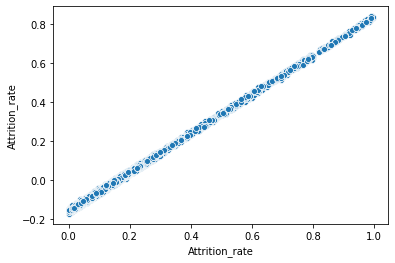

In [219]:
sns.scatterplot(ytrain,ytrain-train_predict)

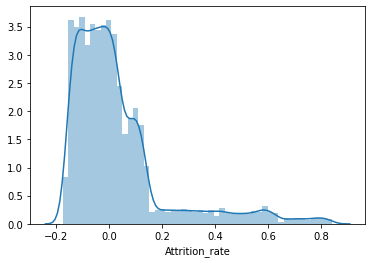

In [220]:
sns.distplot(ytrain-train_predict)

In [221]:
from sklearn.ensemble import RandomForestRegressor


In [222]:
rfr=RandomForestRegressor(max_samples=0.7,oob_score=True)
parameters={"max_depth":[5,10,25,50,100],"min_samples_split":[2,10,50,100,250,500]}
gcv=GridSearchCV(estimator=rfr,param_grid=parameters)
gcv.fit(train_vectorised,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=0.7,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [223]:
gcv.cv_results_

{'mean_fit_time': array([1.03272076, 1.02740307, 1.00821533, 1.00137925, 0.94902883,
        0.88798151, 2.01288276, 1.9052659 , 1.72298441, 1.57703781,
        1.35410199, 1.08882709, 4.15612016, 3.04535146, 2.15305605,
        1.81215434, 1.40424347, 1.1093914 , 4.21437817, 3.05344448,
        2.15377121, 1.81582294, 1.41831088, 1.10534596, 4.23368325,
        3.03689828, 2.14502625, 1.80327721, 1.40242577, 1.09421825]),
 'mean_score_time': array([0.011586  , 0.01162105, 0.01170521, 0.01158638, 0.01124768,
        0.01094875, 0.01878257, 0.01843643, 0.01632009, 0.01584358,
        0.01403718, 0.0124579 , 0.04333649, 0.02737808, 0.01972022,
        0.01697416, 0.01419439, 0.01244626, 0.04426708, 0.02760105,
        0.01970186, 0.01705198, 0.01442084, 0.01241136, 0.04398823,
        0.02773466, 0.01991558, 0.01721506, 0.01439056, 0.01259398]),
 'mean_test_score': array([-0.003871  , -0.00553229, -0.00378602, -0.00405674, -0.00402095,
        -0.0025087 , -0.02155109, -0.01526317, -0.01

In [224]:
rfr=RandomForestRegressor(max_samples=0.7,oob_score=True,min_samples_split=500,max_depth=5)
rfr.fit(train_vectorised,ytrain)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=0.7, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=500, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [225]:
rfr_predict=rfr.predict(train_vectorised)
test_predict=rfr.predict(test_vectorised)
rfr_score=mean_squared_error(ytrain,rfr_predict)
print(rfr_score)

0.03396682558954805


In [227]:
final_data=pd.DataFrame(np.hstack((np.array(xtest_filled["Employee_ID"]).reshape(3000,1),test_predict.reshape(3000,1))),columns=["Employee_ID","Attrition_rate"])
final_data.to_csv("finial_data.csv",index=False)

In [229]:
import xgboost

In [230]:
xgb=xgboost.XGBRegressor(booster="gblinear",subsample=0.7,colsample_bytree=0.7,missing=0.00)

In [231]:
parameters={"gamma":[0.1,1,10],"learning_rate":[0.18,0.2,0.25,0.3],"n_estimators":[85,90,95,100,105]}
gcv=GridSearchCV(estimator=xgb,param_grid=parameters,scoring="neg_mean_squared_error",n_jobs=-1)
gcv.fit(train_vectorised,ytrain)

[12:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gblinear',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.7, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=0.0,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=0.7, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.1, 1, 10],
                         'learning_rate': [0.18, 0.2, 0.25, 0.3],
            

In [232]:
gcv.cv_results_

{'mean_fit_time': array([0.28913226, 0.29753647, 0.31332035, 0.32330441, 0.34308305,
        0.28510399, 0.30147223, 0.30930166, 0.32116342, 0.34781642,
        0.28290977, 0.29450388, 0.31172585, 0.3235456 , 0.33946757,
        0.27618833, 0.29393139, 0.3109364 , 0.32270164, 0.33968573,
        0.27929583, 0.29304852, 0.31773319, 0.32855029, 0.34204221,
        0.284796  , 0.2988368 , 0.30495729, 0.3286562 , 0.34362359,
        0.27805219, 0.29564734, 0.31360254, 0.32625332, 0.34181132,
        0.28791285, 0.29331946, 0.31443334, 0.32670817, 0.34156733,
        0.2806756 , 0.29233866, 0.30739117, 0.32606683, 0.3403368 ,
        0.28085103, 0.29714079, 0.30960717, 0.32633891, 0.34802713,
        0.28021216, 0.29643097, 0.30925565, 0.32037358, 0.33532524,
        0.27290139, 0.29187546, 0.30450182, 0.32526612, 0.33413978]),
 'mean_score_time': array([0.00477691, 0.00464649, 0.00474329, 0.00467486, 0.00491209,
        0.004914  , 0.00473104, 0.00462785, 0.00468726, 0.00464158,
        0.

In [233]:
xgb=xgboost.XGBRegressor(booster="gblinear",n_estimators=105,learning_rate=0.3,subsample=0.7,colsample_bytree=0.7,gamma=10)

In [234]:
xgb.fit(train_vectorised,ytrain)

[12:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=10,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=105,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [235]:
xgb_predict=xgb.predict(train_vectorised)

In [236]:
test_predict=xgb.predict(test_vectorised)

In [237]:
mse_xgb=mean_squared_error(ytrain,xgb_predict)
mse_xgb

0.034498049035675084

In [238]:
final_data=pd.DataFrame(np.hstack((np.array(xtest_filled["Employee_ID"]).reshape(3000,1),test_predict.reshape(3000,1))),columns=["Employee_ID","Attrition_rate"])
final_data.to_csv("finial_data.csv",index=False)

In [239]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [48]:
lr=LinearRegression()

sgd=SGDRegressor(penalty="l2",learning_rate="constant")
rfr=RandomForestRegressor(max_samples=0.7,oob_score=True)
xgb=xgboost.XGBRegressor(booster="gblinear",subsample=0.7,colsample_bytree=0.7,missing=0.00)



In [103]:
sgd=SGDRegressor(penalty="l2",learning_rate="constant")
params={'alpha': [0.001,0.01,0.1, 1.0, 10.0]}
grid = GridSearchCV(estimator=sgd, 
                    param_grid=params, 
                    cv=5,
                    refit=True,scoring="neg_mean_squared_error")
grid.fit(train_vectorised,ytrain)
grid.cv_results_


{'mean_fit_time': array([0.01561966, 0.01512966, 0.01516318, 0.0151515 , 0.01524386]),
 'mean_score_time': array([0.00135894, 0.00135036, 0.00134482, 0.00135384, 0.00136251]),
 'mean_test_score': array([-0.03630264, -0.03749463, -0.03499065, -0.03504572, -0.03489336]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1.0},
  {'alpha': 10.0}],
 'rank_test_score': array([4, 5, 2, 3, 1], dtype=int32),
 'split0_test_score': array([-0.03483048, -0.03358476, -0.03294343, -0.03272354, -0.03273791]),
 'split1_test_score': array([-0.0337392 , -0.03793152, -0.03279059, -0.03357361, -0.03379929]),
 'split2_test_score': array([-0.03627089, -0.03615878, -0.03551886, -0.03528022, -0.03507305]),
 'split3_test_score': array([-0.0347518 , -0.03666619, -0.03410427, -0.03392527, -0.03350727]),
 'split4_te

In [105]:
rfr=RandomForestRegressor(max_samples=0.7,oob_score=True)
params={'max_depth': [2,4,6,8,10,15,20],'min_samples_split':[10,50,100,150,200,250]}
grid = GridSearchCV(estimator=rfr, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(train_vectorised,ytrain)
grid.cv_results_


{'mean_fit_time': array([0.51787505, 0.51621675, 0.51504927, 0.51776552, 0.51745391,
        0.5148766 , 0.85807638, 0.8489604 , 0.84401965, 0.83483415,
        0.82233438, 0.82283797, 1.20367637, 1.17921147, 1.14157643,
        1.1262557 , 1.10067658, 1.06542697, 1.55731401, 1.46695242,
        1.39662313, 1.33591237, 1.28162279, 1.23067946, 1.90387816,
        1.71229196, 1.57787032, 1.47788129, 1.39447331, 1.33308573,
        2.60692096, 2.05732045, 1.78345594, 1.61307073, 1.49648256,
        1.40708294, 2.95952268, 2.14936547, 1.82163658, 1.64240727,
        1.49822655, 1.41227345]),
 'mean_score_time': array([0.00856061, 0.00860577, 0.00862503, 0.00992985, 0.00885782,
        0.0085948 , 0.01048064, 0.01046553, 0.01059451, 0.01028376,
        0.01027436, 0.01053925, 0.01242514, 0.01243787, 0.01224446,
        0.0122015 , 0.01200967, 0.01188169, 0.01604991, 0.01427827,
        0.01484556, 0.01374931, 0.01328716, 0.01294765, 0.0175118 ,
        0.01588883, 0.01529722, 0.01454053, 0.

In [106]:
rfr=RandomForestRegressor(max_samples=0.7,oob_score=True,max_depth=2,min_samples_split=250)
lr=LinearRegression()
sgd=SGDRegressor(penalty="l2",learning_rate="constant",alpha=10)
xgb=xgboost.XGBRegressor(booster="gblinear",subsample=0.7,colsample_bytree=0.7,missing=0.00,)

In [132]:
params = {"meta_regressor__learning_rate":[0.18,0.2,0.25,0.3],"meta_regressor__n_estimators":[85,90,95,100,105]}

In [133]:
stregr=StackingRegressor(regressors=[lr,sgd,rfr],meta_regressor=xgb)

In [134]:
grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=5,
                    refit=True,scoring="neg_mean_squared_error")

In [136]:
grid.cv_results_

{'mean_fit_time': array([0.72450767, 0.72183781, 0.72703786, 0.72802997, 0.73463454,
        0.72163692, 0.72463598, 0.72862105, 0.73054738, 0.73770814,
        0.71771774, 0.73058991, 0.72803593, 0.7316946 , 0.73338118,
        0.72102261, 0.72932119, 0.72821665, 0.73274093, 0.73100863]),
 'mean_score_time': array([0.01534014, 0.01517735, 0.01527295, 0.01537132, 0.01543837,
        0.01515088, 0.01528611, 0.01535206, 0.01530156, 0.01540565,
        0.01523466, 0.01575036, 0.0151032 , 0.01511407, 0.01548262,
        0.01511598, 0.01582375, 0.01520357, 0.01512151, 0.01513953]),
 'mean_test_score': array([-0.03451781, -0.03451781, -0.03451781, -0.0345178 , -0.03451781,
        -0.03451781, -0.03451781, -0.0345178 , -0.03451781, -0.03451781,
        -0.03451781, -0.03451781, -0.03451781, -0.03451781, -0.03451781,
        -0.03451781, -0.03451781, -0.03451781, -0.03451781, -0.03451781]),
 'param_meta_regressor__learning_rate': masked_array(data=[0.18, 0.18, 0.18, 0.18, 0.18, 0.2, 0.2, 0.2,

In [258]:
rfr=RandomForestRegressor(max_samples=0.7,oob_score=True,max_depth=2,min_samples_split=250)
lr=LinearRegression()
sgd=SGDRegressor(penalty="l2",learning_rate="constant",alpha=10)
xgb=xgboost.XGBRegressor(booster="gblinear",subsample=0.7,colsample_bytree=0.7,missing=0.00,learning_rate=0.18,n_estimators=100)

In [259]:
stregr=StackingRegressor(regressors=[xgb,rfr,svr],meta_regressor=sgd)

In [260]:
stregr.fit(train_vectorised,ytrain)

[12:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(meta_regressor=SGDRegressor(alpha=10, average=False,
                                              early_stopping=False, epsilon=0.1,
                                              eta0=0.01, fit_intercept=True,
                                              l1_ratio=0.15,
                                              learning_rate='constant',
                                              loss='squared_loss',
                                              max_iter=1000, n_iter_no_change=5,
                                              penalty='l2', power_t=0.25,
                                              random_state=None, shuffle=True,
                                              tol=0.001,
                                              validation_fraction=0.1,
                                              verbose=0, warm_start=False),
                  refit=Tr...
                                                    min_samples_split=250,
                            

In [261]:
train_predict=stregr.predict(train_vectorised)

In [262]:
test_predict=stregr.predict(test_vectorised)

In [263]:
mean_squared_error(ytrain,train_predict)

0.0345998278374546

In [264]:
final_data=pd.DataFrame(np.hstack((np.array(xtest_filled["Employee_ID"]).reshape(3000,1),test_predict.reshape(3000,1))),columns=["Employee_ID","Attrition_rate"])
final_data.to_csv("finial_data.csv",index=False)